# Project: Analysis of a No_showAppointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Section 1: Introduction

This poject aims to investigate the factors that relate to patients showing up for appointments once the appointments have been scheduled. The data set that has been selected for analysis purpose in this project is the <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv">noshowappointments-kagglev2-may-2016.csv</a> data set. The tables in this dataset are PatientId, AppointmentID, ScheduledDay, AppointmentDay, Age, Neighbourhood (understood to be the hospital's location), Scholarship (the <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">Bolsa Familia</a> scholarship, a program in Latin-America countries like Brazil, to fund poor people and eventually cripple poverty), Hypertension, Diabetes, Alcoholism, Handcap (depicting if patient is handicapped or not), SMS_received (assumed to be whether the patient received appointment confirmation text) and No-show (entries of whether the patient showed up for the appointment or not).

In [1]:
# Setting up required packages and dependecies

import pandas as pd
import numpy as np 
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
# checking our pandas version first

print(pd.__version__)

1.3.5


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Question(s) for Analysis

The questions that were to be answered in this project include, but were not limited to:
1. How many people showed up for an appointment ?
2. For the scheduled appointments, what is the comparison of people by Gender ?
3. What was the age distribution of the number of people who were scheduled for appointment ?
4. How many people who were scheduled for appointments were under the Bolsa Familia Scholarship ?
5. How many people scheduled for appointments were Hipertensive ?
6. How many people were Diabetic ?
7. How many people are alcoholic ?
8. From the dataset how many people were handicapped ?
9. How many people received SMS messages to attend an appointment ?

<a id='wrangling'></a>
## Section 2: Data Wrangling
In this phase, the CSV file containing the data was loaded as a data frame, printed to display some lines of the data and proceeded to carry out operations to check out the data types. I also went further to check for missing and even possibly data that was not correct. Later on, I sanitized the dataset and edited some and all of the columns to best serve in the Exploratory Data Analysis phase.


### General Properties

In [4]:
#loading the dataset to be used
no_showup_df = pd.read_csv('/content/drive/MyDrive/noshowappointments-kagglev2-may-2016.csv')

In [5]:
#dispalying dataset head section
no_showup_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#checking dataset last few rows
no_showup_df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Displayed above are two sections of the dataset, the first 5 and last 5 rows

In [7]:
#checking the number of rows in out dataset

print('Rows in our dataset are', len(no_showup_df))

Rows in our dataset are 110527


In [8]:
#checking the number of columns in out dataset

print('Columns in our dataset are', len(no_showup_df.columns))

Columns in our dataset are 14


In [9]:
#checking the columns present in out dataset

no_showup_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
#examining the columns data types

no_showup_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

No column in the dataset had a missing values as shown after running the next code cell. 

In [11]:
#checking the number of missing values in our data frame columns

no_showup_df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

I then proceed to checking for any duplicate rows. I discovered that our dataset had no duplicate row values.

In [12]:
# checking if the dataframe has duplicate values using the sum() function

duplicate_rows = no_showup_df[no_showup_df.duplicated()]
sum(no_showup_df.duplicated())

0

After running some individual commands to check the data frame's general information, here is a quick summary of the dataset information. It shows the column names, zero count of null values in each column and lastly the data types of each column. This information would help us in our next phases of cleaning and exploring the data set.


In [13]:
# A summary of the data frame information
no_showup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning 

After checking the data set, cleaning and tweaking some entries of the dataset was required. This was important to ensure no Python errors would be experienced when converting the dataset to data frame for further exploration and analysis. These included removing special character form different column, renaming a column, changing all column names to lowercase and finally saving the dataset as a new dataset.

#### 1. Removing special characters

After assessing the dataset, I decide to clean it. The first step was removing any special characters that were present within different columns of the data set. The first cleaning was performed on the Neighebourhood column. The enrtries in this column had a number of special characters and this would have perhaps posed an error when analysing the data according to different Neighbourhoods. 

In [14]:
# cleaning the Neighbourhood column
cols = ['Neighbourhood']
no_showup_df[cols] = no_showup_df[cols].replace(('\$', '"', '-', ',',''), regex=True)
no_showup_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Renaming columns

The next step I took was renaming the No-show column to "No_show". I did so to avoid python string errors when working with columns. 

In [15]:
# renaming the column No-show to No_show
no_showup_df.rename(columns={'No-show': 'no_show'}, inplace=True)
no_showup_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 3. Changing all column names to lowercase

Python being a case-sensitive language, I saw it wise to change all the column names to lowercase. This was a move to equally avoid further errors and save on computation time.   

In [16]:
# displaying columns
no_showup_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'no_show'],
      dtype='object')

In [17]:
# changing column names to lowercase
no_showup_df.columns = map(str.lower, no_showup_df.columns)

In [18]:
# displaying columns after changing case
no_showup_df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [19]:
#check the data frame head for changes
no_showup_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 4. Saving the prepared data frame as a new csv data set

In [20]:
# saving the updated dataframe as a new csv data set
no_showup_df.to_csv('/content/drive/My Drive/updated_noshowappointments-kagglev2-may-2016.csv') #data frame saved to csv format

<a id='eda'></a>
## Section 3: Exploratory Data Analysis

In [21]:
#loading the dataset to be used
no_showup_df = pd.read_csv('/content/drive/My Drive/updated_noshowappointments-kagglev2-may-2016.csv')
no_showup_df.head()

,Unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
# displaying the data frame columns 

no_showup_df.columns

Index(['Unnamed: 0', 'patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

I noticed the a new column 'Unnamed: 0' with entries similar to the index column. I proceeded to deleting it since we already had an index column which we intended to keep.

In [23]:
# dropping the Unnamed column
no_showup_df.drop(['Unnamed: 0'], axis=1, inplace=True) #asigning the axis to 1 to indicate action on column

In [24]:
# checking the data frame after dropping the Unnamed column
no_showup_df.head() # checking the updated data frame's head

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### (i) Useful Statistics from each column

In [25]:
# important summary of statistics drawn from each column of the dataframe

no_showup_df.describe() #code to output the columns statistics

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The statistics were important to allow us know the averages of the different columns. For example, from the statistics, we could note that the average age of people from the dataset was 37 years old.

### (ii) Printing correlation to assess the retionships of the different variables using their correlation values

In [26]:
# using the correlation function corr() on our data frame
corr = no_showup_df.corr() 

#setting up the correlation style for our output
corr.style.background_gradient(cmap='coolwarm') 

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
patientid,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
appointmentid,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
sms_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


1. From the output table displayed, I discovered that there was a positive distribution of correlation amongst some variables. For instance, we can tell that **Age and Hipertension are moderately correlated** with a correlation coefficient of **0.504586**. Others that were positevely **correlated**, though **lowely**, were **Diabetes and Hipertension** with a coeffecient of **0.433086** followed by **Age and Diabetes** with a correlation coeffecient of **0.292391**.  

2. Although "correlation does not imply causation", the correlation coefficient table drove a **keen interest** on metrics like **Age**, **Hipertension** and **Diabetes** to be explored in our investigation.

To answer the questions that I had, I proceeded to draw histograms of the number of people against the different columns. This was important and led to meaningful descriptive statistics through visualizations of how the people were distributed across the different field e.g gender, age, showing up for appointments or not, and so on.

### 1. How many people showed up for an appointment ?

It is **important** to note that:
1. no_showapp = **(No) indicates** that the person/people **showed up** for the appointment
2. no_show = **(Yes) means** that the person/people **did not show** up for the appointment

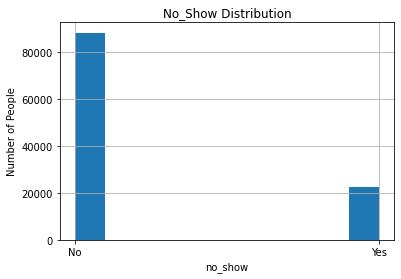

In [35]:
# Plotting histogram

#creating a function to plot histogram
def plot_histogram(column_name, xaxis_label, title):
  no_showup_df[column_name].hist(); 
  plt.xlabel(xaxis_label);
  plt.ylabel('Number of People')
  plt.title(title);
  plt.grid(True)

#calling the plot_histogram function and input values
plot_histogram('no_show','no_show','No_Show Distribution')

From the histogram above, **out of the 110,527 people** we can tell that **many people** (above **80,000** people) **showed up** for for appointments compared to the close to 20,000 people who did not show up for appointments.

### 2. For the scheduled appointments, what is the comparison of people by Gender ?

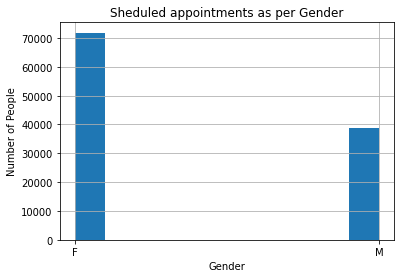

In [36]:
#calling the plot_histogram function and input values
plot_histogram('gender','Gender', 'Sheduled appointments as per Gender')

From the histogram above, more females (F) compaperd to males (M) visited the different neighbourhood hospitals. On an approximate, out of the **110,000 people**:
1. **around 70,000 females visisted** the hospitals 
2. **almost 40,000 males went to hospital** 

### 3. What was the age distribution of the number of people who were scheduled for appointment ?

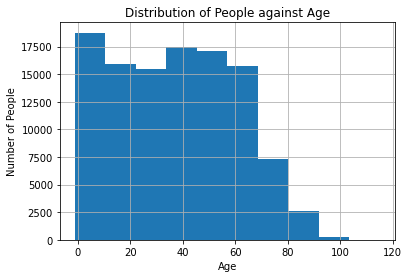

In [38]:
#calling the plot_histogram function and input values
plot_histogram('age','Age','Distribution of People against Age')

From the histogram drawn, we can tell that few of the people who visited the hospital were eldery (60 years and above). **Majority of the peole who went to hospital were aged below 60 years old**.

### 4. How many people who were scheduled for appointments were under the Bolsa Familia Scholarship ?

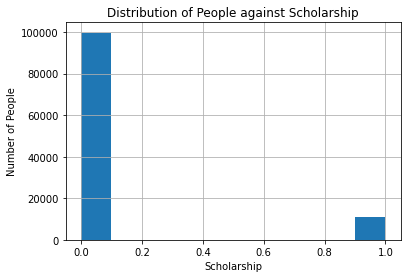

In [39]:
# checking how many people who visited the neighbourhood hospitals
# benefit from the scholarship

#calling the plot_histogram function and input values
plot_histogram('scholarship','Scholarship','Distribution of People against Scholarship')

From the histogram that was drawn, '1' depicting True for scholarship and '0' zero indicating 'False' / not in the scholarship program, we could tell that **majority of people (around 100,000)** who were scheduled for appointments **were not part of the Bolsa Familia scholarship**.

### 4.2 How many people who had appointments were under the Bolsa Familia Scholarship ?

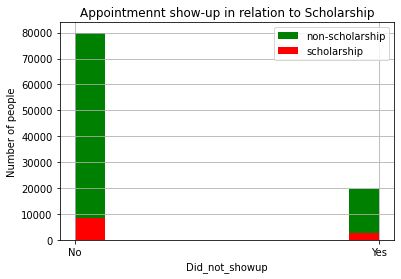

In [40]:
#plotting Scholarship beneficiaries and non-beneficiaries who showed up and did not show up for appointments

plt.hist(no_showup_df.no_show[no_showup_df.scholarship == False], 10, facecolor='g', alpha=1, label='non-scholarship');
plt.hist(no_showup_df.no_show[no_showup_df.scholarship == True], 10, facecolor='r', alpha=1, label='scholarship');
plt.legend()
plt.xlabel('Did_not_showup')
plt.ylabel('Number of people')
plt.title('Appointmennt show-up in relation to Scholarship')
plt.grid(True)

Plotting the histogram above, I noticed that the people who **had appointments and were under Bosla Scholarship** were slightly **below 10,000 people**.

### 5. How many people scheduled for appointments were Hipertensive ?

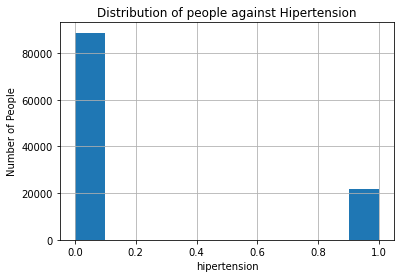

In [41]:
#calling the plot_histogram function and input values
plot_histogram('hipertension','hipertension','Distribution of people against Hipertension')

From the histogram plot of people against hipertension, with 1 depicting True for hipertension and 0 otherwise, we can tell that **majority** of people who went to the hospital **(over 80,000 people)** were **not hipertensive**.

### 5. How many people did not show up for appointments and were not Hipertensive ?

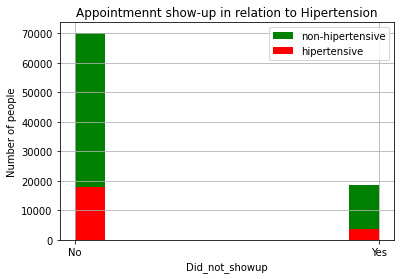

In [42]:
#plotting hipertensive and non-hipertensive people who showed up and did not show up for appointmenst 
plt.hist(no_showup_df.no_show[no_showup_df.hipertension == False], 10, facecolor='g', alpha=1, label='non-hipertensive');
plt.hist(no_showup_df.no_show[no_showup_df.hipertension == True], 10, facecolor='r', alpha=1, label='hipertensive');
plt.legend()
plt.xlabel('Did_not_showup')
plt.ylabel('Number of people')
plt.title('Appointmennt show-up in relation to Hipertension')
plt.grid(True)

We can estimate that **about 15,000 people who had no hipertension did not show up for the appointments**. 

### 6. How many people were Diabetic ?

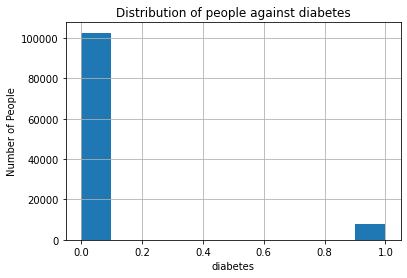

In [43]:
#calling the plot_histogram function and input values
plot_histogram('diabetes','diabetes','Distribution of people against diabetes')

From the histogram, **over 100,000 people had no diabetes**. Very few people who went to the neighbourhood hospitals were diabetic

### 6.1 How many people who showed up for appointments were Diabetic ?

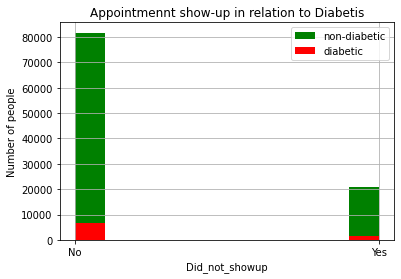

In [44]:
#plotting diabetic and non-diabetic people who showed up and did not show up for appointments 
plt.hist(no_showup_df.no_show[no_showup_df.diabetes == False], 10, facecolor='g', alpha=1, label='non-diabetic');
plt.hist(no_showup_df.no_show[no_showup_df.diabetes == True], 10, facecolor='r', alpha=1, label='diabetic');
plt.legend()
plt.xlabel('Did_not_showup')
plt.ylabel('Number of people')
plt.title('Appointmennt show-up in relation to Diabetis')
plt.grid(True)

We were able to note that less than 10,000 people who shwowed up for the appointments were diabetic. 

### 7. How many people are non-alcoholic ?

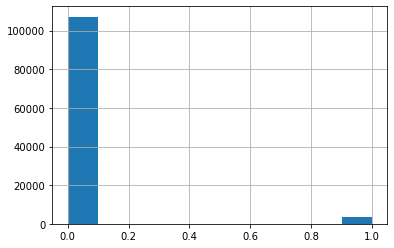

In [ ]:
# Number of people distributed across alcoholism

no_showup_df['alcoholism'].hist(); # use of hist() function to draw histogram

After plotting the histogram of number of peaople against alcoholism, it was important to note that, **from the 110,527 people** who visited the hospital **over 100,000 people were not alcoholic**.

### 7.1 How many people who are non-alcoholics had appointments?

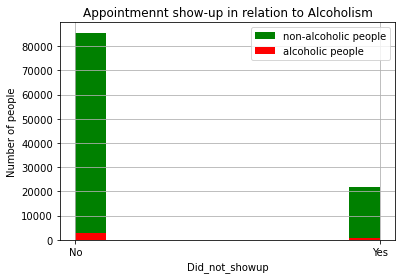

In [ ]:
#plotting alcoholic and non-alcoholic people who showed up and did not show up for appointments 
plt.hist(no_showup_df.no_show[no_showup_df.alcoholism == False], 10, facecolor='g', alpha=1, label='non-alcoholic people');
plt.hist(no_showup_df.no_show[no_showup_df.alcoholism == True], 10, facecolor='r', alpha=1, label='alcoholic people');
plt.legend()
plt.xlabel('Did_not_showup')
plt.ylabel('Number of people')
plt.title('Appointmennt show-up in relation to Alcoholism')
plt.grid(True)

Around 80,000 people who had the appointments were non-alcoholic

### 8. From the dataset how many people were handicapped ?

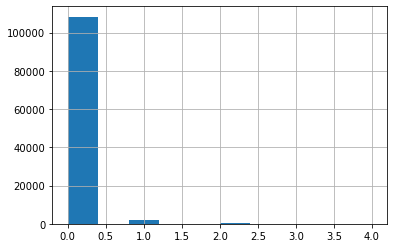

In [ ]:
# Distribution of number of people against being handicapped

no_showup_df['handcap'].hist(); # use of hist() function to draw histogram

After plotting the histogram I noticed that **over 100,000 people were not handicapped**. This also showed that out of the 110,527 people, very little people were handicapped

### 8.1 How many people who did not show up for appointments were handicapped?

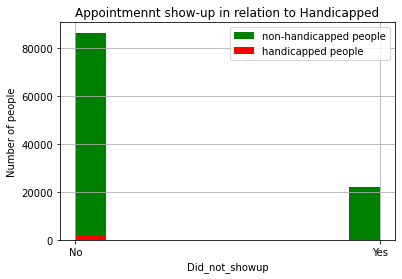

In [ ]:
#plotting handicapped and non-handicapped people who showed up and did not show up for appointments 
plt.hist(no_showup_df.no_show[no_showup_df.handcap == False], 10, facecolor='g', alpha=1, label='non-handicapped people');
plt.hist(no_showup_df.no_show[no_showup_df.handcap == True], 10, facecolor='r', alpha=1, label='handicapped people');
plt.legend()
plt.xlabel('Did_not_showup')
plt.ylabel('Number of people')
plt.title('Appointmennt show-up in relation to Handicapped')
plt.grid(True)

I discovered that almost everyone who did not show up for the appointment was not handicapped.

### 9. How many people received SMS messages to attend an appointment ?

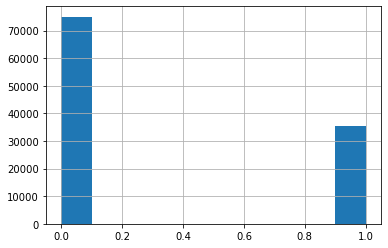

In [ ]:
# Number of people against sms_distribution

no_showup_df['sms_received'].hist(); # use of hist() function to draw histogram

Upon plotting the histogram, I noticed that **above 30,000 people received SMS for appointments**. 

### 9.1 How many people who received the SMS showed up for appointment?

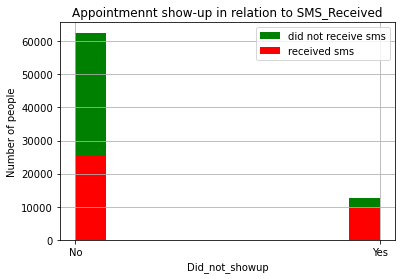

In [ ]:
#plotting handicapped and  non-handicapped people who showed up and did not show up for appointments 
plt.hist(no_showup_df.no_show[no_showup_df.sms_received == False], 10, facecolor='g', alpha=1, label='did not receive sms');
plt.hist(no_showup_df.no_show[no_showup_df.sms_received == True], 10, facecolor='r', alpha=1, label='received sms');
plt.legend()
plt.xlabel('Did_not_showup')
plt.ylabel('Number of people')
plt.title('Appointmennt show-up in relation to SMS_Received')
plt.grid(True)

Above 20,000 people who received SMS showed up for appointments. This plot also projects around 40,000 people who did not receive SMS texts but still showed up for appointments.

<a id='conclusions'></a>
## Section 4: Conclusions and findings communication

The investigation done was aimed at finding how the different variables (columns) influence the likelyhood of a patient not showing up for an appointment. The variables that were explored were Gender, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcapped, SMS_received, and No-show.
 
My findings were:
1. There were a total of 110,527 people. 
2. Out of the 110,527 people we can tell that many people (above 80,000 people) showed up for for appointments compared to the minority, close to 20,000 people who did not show up for appointments**.
3. More females compaperd to males visited the different neighbourhood hospitals. This was approximately 70,000 females visisted compared to around 40,000 males who went to hospital.
4. Few elderly people 60 years and above visited the hospital. Majority of the peole who went to hospital were below 60 years old. 
5. Majority of the people (around 100,000 people) who went to hospital were not beneficiaries of the Bolsa Familia scholarship. Plotting the histogram above, I noticed that the people who had appointments and were under Bosla Scholarship** were slightly below 10,000 people.
6. We can tell that majority of people who went to the hospital (over 80,000 people) were not hipertensive. We can estimate that about 15,000 non-hipertensive people did not show up for the appointments. 
7. Over 100,000 people had no diabetes and we were able to note that less than 10,000 people who shwowed up for the appointments were diabetic. 
8. From the 110,527 people who visited the hospital over 100,000 people were non-alcoholic and 80,000 people who were non-alcoholic had the appointments. 
9. Over 100,000 people were not handicapped, depicting that out of the 110,527 people, very little people were handicapped. I equally discovered that almost everyone who did not show up for the appointment was not handicapped.
10. Majority of the people did not receive SMS. Above 20,000 people received SMS and showed up for appointments while around 40,000 people who did not receive SMS texts showed up for appointments.

**The main focus was on the close to 20,000 people who failed to show up**. Of these 20,000 people
1. Around 3,800 people were non=hipertensive.
2. Around 1,000 people were diabetic.
3. Around 10,000 people received texts.
4. Around 500 peopel or less were handicapped.
5. Around 1,000 people were alcoholic.
6. Around 2,000 people had Bosla Familia scholarship.

From this conlclusion based on estimates, around 10,000 people who received SMS texts failed to show up. The other variables too influenced the lack of showing up but SMS_received matric contributed more. This therefore raises the question, "Why would a patient receive an SMS text and still fall to show up." Guided by our correlatioin coefficient table, SMS_received was very low correlated with other variables. Still, correlation deos not imply causation thus SMS_received oughts to be investigated with other variables and importantly.

**Recommendations**
1. More variables should be introduced to the dataset to help answer questions like, what could be the cause of a patient who received an SMS message for appointment but fail to show up for an appointment after its scheduling. 

<a id='References'></a>
## References

McKinney, W. (2011). pandas: a foundational Python library for data analysis and statistics. Python for high performance and scientific computing, 14(9), 1-9.

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in science & engineering, 9(03), 90-95.

Van Der Walt, S., Colbert, S. C., & Varoquaux, G. (2011). The NumPy array: a structure for efficient numerical computation. Computing in science & engineering, 13(2), 22-30.